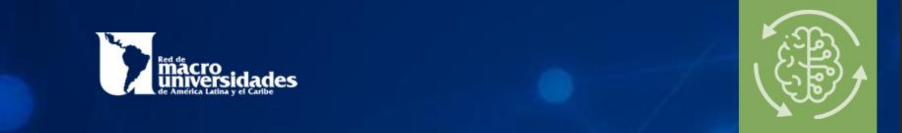


---
<center>

💻 **INTELIGENCIA ARTIFICIAL**

</center>


---

Israel Martinez

##Regularizacion para MLP



In [ ]:
#https://arxiv.org/pdf/1702.05373.pdf

In [ ]:
!pip install extra-keras-datasets #Bases de datos extras

In [ ]:
# TensorFlow y tf.keras
import tensorflow as tf
from tensorflow import keras
from extra_keras_datasets import emnist

# Librerias de ayuda
import numpy as np
import matplotlib.pyplot as plt

In [ ]:
#Carga del dataset
fashion_mnist = keras.datasets.fashion_mnist

(train_inputs, train_labels), (test_inputs, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [ ]:
#Definiendo las clases
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

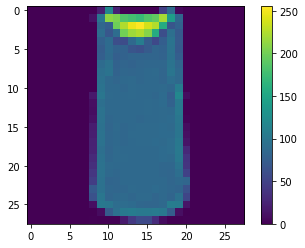

In [ ]:
#Mostrando un ejemplo
plt.figure()
plt.imshow(train_inputs[2])
plt.colorbar()
plt.grid(False)
plt.show()

In [ ]:
#Normalizacion del dataset
train_inputs = train_inputs / 255.0

test_inputs = test_inputs / 255.0

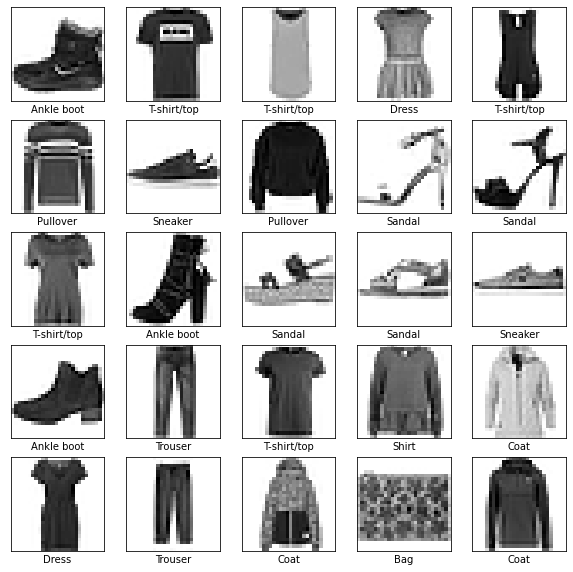

In [ ]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_inputs[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),

    keras.layers.Dense(128, activation='relu'),

    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


In [ ]:
history=model.fit(train_inputs, train_labels,
                  epochs=5,
                  batch_size=100,
                  shuffle=True,
                  validation_data=(test_inputs, test_labels))

Epoch 1/5
600/600 [==============================] - 2s 3ms/step - loss: 0.5404 - accuracy: 0.8147 - val_loss: 0.4765 - val_accuracy: 0.8298
Epoch 2/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3948 - accuracy: 0.8613 - val_loss: 0.4260 - val_accuracy: 0.8478
Epoch 3/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3568 - accuracy: 0.8727 - val_loss: 0.3902 - val_accuracy: 0.8594
Epoch 4/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3311 - accuracy: 0.8796 - val_loss: 0.3652 - val_accuracy: 0.8712
Epoch 5/5
600/600 [==============================] - 2s 3ms/step - loss: 0.3084 - accuracy: 0.8884 - val_loss: 0.3725 - val_accuracy: 0.8658


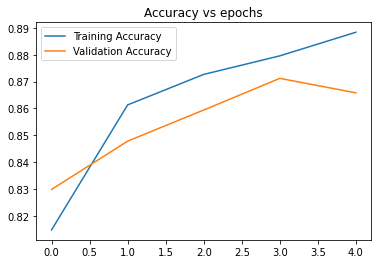

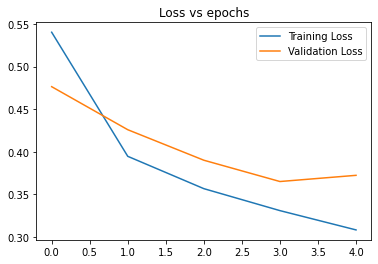

In [ ]:
plt.figure()
plt.title("Accuracy vs epochs")
plt.plot( history.history['accuracy'] )
plt.plot( history.history['val_accuracy'] )
plt.legend(['Training Accuracy', 'Validation Accuracy'])


plt.figure()
plt.title("Loss vs epochs")
plt.plot( history.history['loss'] )
plt.plot( history.history['val_loss'] )
plt.legend(['Training Loss', 'Validation Loss'])

In [ ]:
predictions = model.predict(test_inputs)

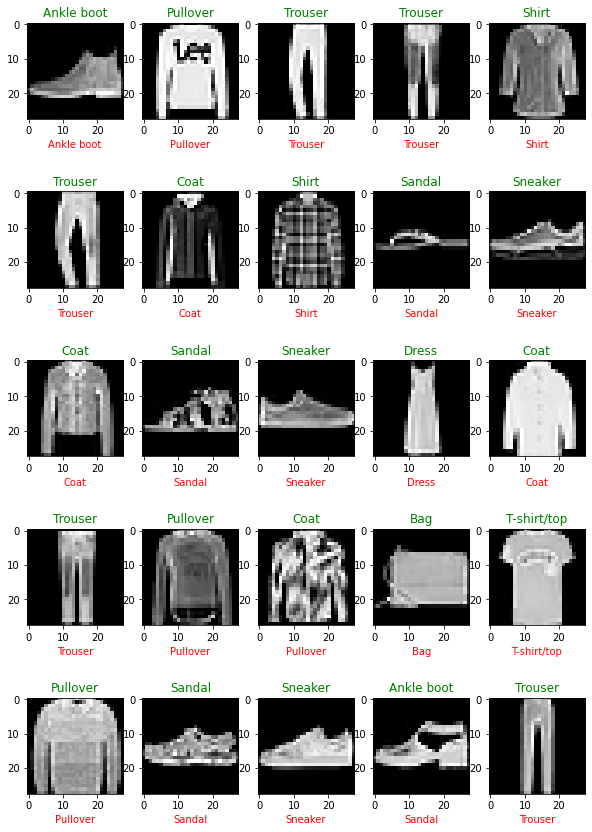

In [ ]:
plt.figure(figsize=(10,15))
for i in range(25):
    plt.subplot(5,5,i+1)
    #plt.xticks([])
    #plt.yticks([])
    #plt.grid(False)

    plt.imshow(test_inputs[i].reshape(28,28), 'gray')
    plt.title(class_names[test_labels[i]], color='g')
    plt.xlabel(class_names[np.argmax(predictions[i])], color='r')

plt.show()

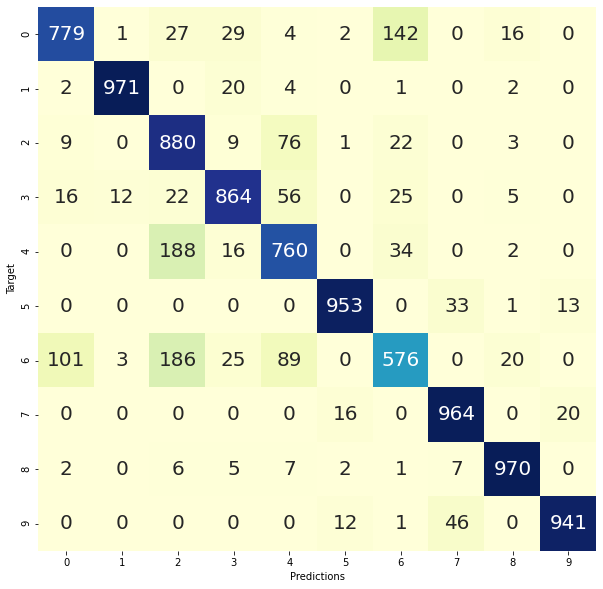

In [ ]:
from sklearn.metrics import confusion_matrix
import seaborn as sns
import pandas as pd

cm=confusion_matrix(test_labels, np.argmax(predictions,axis=1))
cm_df=pd.DataFrame(cm)
plt.figure(figsize=(10,10))
sns.heatmap(cm_df, annot=True, cmap= "YlGnBu", annot_kws={"size": 20}, cbar=False, fmt='g');
plt.xlabel('Predictions');
plt.ylabel('Target');

##kernel_regularizer

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),

    keras.layers.Dense(128, activation='relu'),

    keras.layers.Dense(10, activation='softmax')
])

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),

    keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.01)),

    keras.layers.Dense(10, activation='softmax')
])

##bias_regularizer

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),

    keras.layers.Dense(128, activation='relu', bias_regularizer=regularizers.l2(0.01)),

    keras.layers.Dense(10, activation='softmax')
])

##activity_regularizer

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),

    keras.layers.Dense(128, activation='relu', activity_regularizer=regularizers.l1_l2(0.01)),

    keras.layers.Dense(10, activation='softmax')
])

## l1, l2 y Elastic_net (l1_l2)

In [ ]:
from tensorflow.keras import regularizers
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),

    keras.layers.Dense(128, activation='relu', kernel_regularizer=regularizers.l1(0.01), bias_regularizer=regularizers.l2(0.01), activity_regularizer=regularizers.l1_l2(0.01)),

    keras.layers.Dense(10, activation='softmax')
])

##Ðrop_out

In [ ]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(28, 28)),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(128, activation='relu'),
    keras.layers.Dropout(0.2),
    keras.layers.Dense(10, activation='softmax')
])